In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torch.nn.parameter import Parameter

import numpy as np

is f.linear + f.linear == f.linear(torch.concat)

In [6]:
input = torch.ones(5,2)
hidden = torch.ones(5,2)

w_ih = torch.ones(5,2)
w_hh = torch.ones(5,2)

lin1 = F.linear(input, w_ih, None)
lin2 = F.linear(hidden, w_hh, None)

concat_input = torch.cat([input, hidden])
concat_weight = torch.cat([w_ih, w_hh])

res2 = F.linear(concat_input, concat_weight)
res1 = lin1 + lin2

#res1 == res2 proves that no
input.transpose(0, 1)


 1  1  1  1  1
 1  1  1  1  1
[torch.FloatTensor of size 2x5]

In [3]:
import imp
import rnn
import rnn_cells
imp.reload(rnn)
imp.reload(rnn_cells)

<module 'rnn_cells' from '/home/allen/dev/Web2/model/rnn_cells.py'>

In [7]:
input_size = 1
hidden_size = 1
gru_cell = rnn_cells.GRUCell(input_size, hidden_size)
gru = rnn.RNN(input_size, hidden_size, gru_cell)
gru.double()

RNN(
  (cell): GRUCell(
  )
)

In [8]:
from torch.autograd import Variable as V

input = V(torch.ones(1,1))
out = gru(input)
print(out)

input is  torch.Size([1])
hidden is  torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([3, 1])
torch.Size([3, 1])


RuntimeError: Expected object of type Variable[torch.FloatTensor] but found type Variable[torch.DoubleTensor] for argument #1 'mat2'

In [48]:
np.random.seed(2)

T = 20
L = 1000
N = 100

x = np.empty((N,L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')


In [49]:
import matplotlib
import matplotlib.pyplot as plt

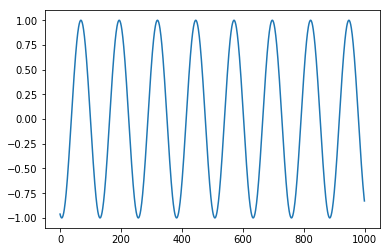

In [50]:
plt.plot(data[3])
plt.show()

In [51]:
data.shape

(100, 1000)

In [52]:
input = V(torch.from_numpy(data[3:, :-1]), requires_grad=False)
target = V(torch.from_numpy(data[3:, 1:]), requires_grad=False)
test_input = V(torch.from_numpy(data[:3, :-1]), requires_grad=False)
test_target = V(torch.from_numpy(data[:3, 1:]), requires_grad=False)

In [60]:
def plot_losses():
    pass

In [74]:
input

Variable containing:
-0.9613 -0.9738 -0.9840  ...  -0.7353 -0.7683 -0.7993
-0.2474 -0.1987 -0.1494  ...  -0.6560 -0.6174 -0.5774
 0.9320  0.9490  0.9636  ...   0.6702  0.7065  0.7410
          ...             ⋱             ...          
-0.2474 -0.1987 -0.1494  ...  -0.6560 -0.6174 -0.5774
 0.9975  0.9998  0.9996  ...   0.8596  0.8841  0.9063
-0.9975 -0.9927 -0.9854  ...  -0.9231 -0.9412 -0.9569
[torch.DoubleTensor of size 97x999]

In [79]:
import torch.optim as optim

import imp
import rnn
import rnn_cells
import cell_functions
imp.reload(rnn)
imp.reload(rnn_cells)
imp.reload(cell_functions)

def train():
    np.random.seed(0)
    torch.manual_seed(0)
    
    input_size = 999
    hidden_size = 51
    gru_cell = rnn_cells.GRUCell(input_size, hidden_size)
    gru = rnn.RNN(input_size, hidden_size, gru_cell)
    gru.double()
    
    criterion = nn.MSELoss()
    
    optimizer = optim.LBFGS(gru.parameters(), lr=0.8)
    
    hidden_state = []
    hidden_state.append(None)
    def train_step():
        optimizer.zero_grad()
        out = gru(input, hidden_state[-1])
        loss = criterion(out[0], target)
        hidden.append(out[1])
        print('loss: ', loss.data.numpy()[0])
        loss.backward()
        return loss
    
    for i in range(15):
        print("Step: %d" % i)
        optimizer.step(train_step)
        
        # PREDICTIONS
        future = 1000
        pred = gru(test_input, hidden_state[-1], future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss: ', loss.data.numpy()[0])
        
        y = pred.data.numpy()
        
        plot_losses()

train()


Step: 0
input is  torch.Size([999])
hidden is  torch.Size([97, 51])


RuntimeError: size mismatch, m1: [1 x 999], m2: [1 x 153] at /opt/conda/conda-bld/pytorch_1513368888240/work/torch/lib/TH/generic/THTensorMath.c:1416